In [ ]:
#| hide
import numpy as np
import matplotlib.pyplot as plt
from circadian.metrics import esri
from circadian.lights import LightSchedule

# ESRI

The Entrainment Signal Regularity Index (ESRI) is a metric of circadian health introduced by Moreno et al. 2023 in the article [Validation of the Entrainment Signal Regularity Index and associations with children's changes in BMI](https://doi.org/10.1002/oby.23641). This metric quantifies how much light schedules entrain circadian rhythms. The ESRI metric uses a decoupled `Hannay19` model:  both the coupling between individual oscillators (parameter `K`) and frequency heterogeneity (parameter `gamma`) are set to 0. To calculate ESRI, fixed windows of a given light schedule are simulated, and the final amplitude of the decoupled model is taken as the ESRI value. This amplitude is close to 1 for highly entraining and regular schedules, and close to 0 for non-entraining schedules, like a train of random pulses. For more details see the [original article](https://doi.org/10.1002/oby.23641).

The interface for calculating ESRI is given by `esri`. For example, we can compare the metric for four different light schedules:

- A regular schedule with 8 hours of darkness and 16 hours of light
- A shift work schedule with 5 days on and 2 days off
- A random schedule created with pulses of random start times and durations
- A constant darkness schedule

```python
import matplotlib.pyplot as plt
from circadian.metrics import esri
from circadian.lights import LightSchedule

dt = 0.1 # hours
days = 14
time = np.arange(0, 24*days, dt)
esri_dt = 2.0 # hours
# regular schedule
regular_schedule = LightSchedule.Regular(lux=1000)
regular_light = regular_schedule(time)
esri_time_regular, esri_array_regular = esri(time, regular_light, esri_dt=esri_dt)
# shift work schedule
shift_schedule = LightSchedule.ShiftWork(lux=1000)
shift_light = shift_schedule(time)
esri_time_shift, esri_array_shift = esri(time, shift_light, esri_dt=esri_dt)
# irregular schedule
n_pulses = 8
schedule = LightSchedule(0.0)
for n in range(n_pulses):
    start = np.random.uniform(0, 24*days)
    lux = np.random.uniform(10.0, 1000.0)
    duration = np.random.uniform(5.0, 16.0)
    schedule += LightSchedule.from_pulse(lux, start, duration)
irregular_light = schedule(time)
esri_time_irregular, esri_array_irregular = esri(time, irregular_light, esri_dt=esri_dt)
# darkness schedule
darkness_schedule = LightSchedule(0.0)
darkness = darkness_schedule(time)
esri_time_darkness, esri_array_darkness = esri(time, darkness, esri_dt=esri_dt)
```

In [ ]:
#| echo: false
dt = 0.1 # hours
days = 14
time = np.arange(0, 24*days, dt)
esri_dt = 2.0 # hours
# regular schedule
regular_schedule = LightSchedule.Regular(lux=1000)
regular_light = regular_schedule(time)
esri_time_regular, esri_array_regular = esri(time, regular_light, esri_dt=esri_dt)
# shift work schedule
shift_schedule = LightSchedule.ShiftWork(lux=1000)
shift_light = shift_schedule(time)
esri_time_shift, esri_array_shift = esri(time, shift_light, esri_dt=esri_dt)
# irregular schedule
n_pulses = 8
schedule = LightSchedule(0.0)
for n in range(n_pulses):
    start = np.random.uniform(0, 24*days)
    lux = np.random.uniform(10.0, 1000.0)
    duration = np.random.uniform(5.0, 16.0)
    schedule += LightSchedule.from_pulse(lux, start, duration)
irregular_light = schedule(time)
esri_time_irregular, esri_array_irregular = esri(time, irregular_light, esri_dt=esri_dt)
# darkness schedule
darkness_schedule = LightSchedule(0.0)
darkness = darkness_schedule(time)
esri_time_darkness, esri_array_darkness = esri(time, darkness, esri_dt=esri_dt)

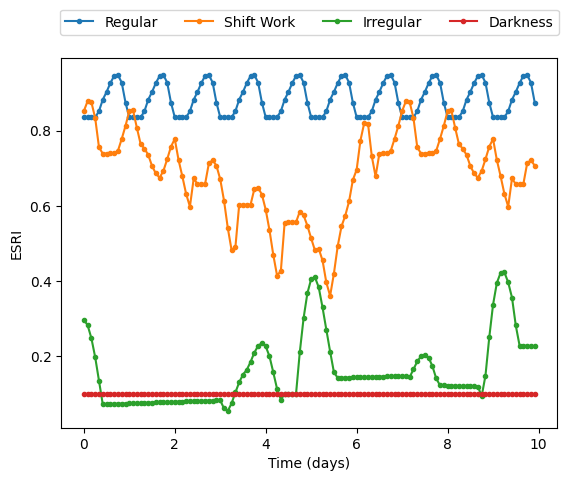

In [ ]:
#| echo: false
plt.plot(esri_time_regular/24.0, esri_array_regular, label='Regular', marker='o', markersize=3)
plt.plot(esri_time_shift/24.0, esri_array_shift, label='Shift Work', marker='o', markersize=3)
plt.plot(esri_time_irregular/24.0, esri_array_irregular, label='Irregular', marker='o', markersize=3)
plt.plot(esri_time_darkness/24.0, esri_array_darkness, label='Darkness', marker='o', markersize=3)
plt.xlabel('Time (days)')
plt.ylabel('ESRI')
# place legend at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

This result shows the ESRI value for each start time of the analysis window. The default window length is 4 days, and the default window step is 1 hour. That's why ESRI is only calculated for half of our simulation time (8 days). In the following plot, we see that the overall ESRI value for a highly regular schedule is larger than for a random schedule, and that the ESRI value for constant darkness is 0.1 which matches the default starting amplitude for the model. Both the window length and default starting amplitude can be changed with the `analysis_days` and `initial_amplitude` parameters.

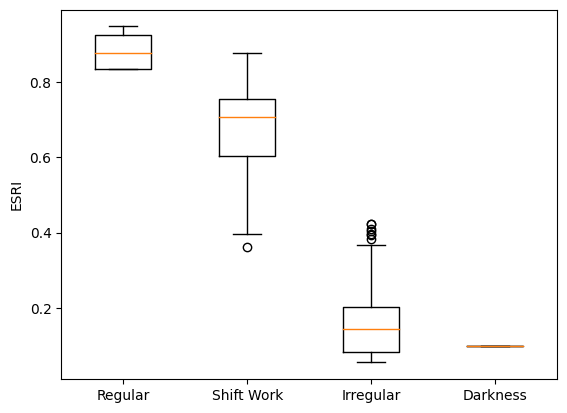

In [ ]:
#| echo: false
# create a boxplot comparing the three schedules
data = [esri_array_regular, esri_array_shift, esri_array_irregular, esri_array_darkness]
names = ['Regular', 'Shift Work', 'Irregular', 'Darkness']
plt.boxplot(data, labels=names)
plt.ylabel('ESRI')
plt.show()